<a href="https://colab.research.google.com/github/wypa93/linkedIn_Scraping/blob/main/linkedin_jobs_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
title_list=[]
company_list=[]
date_list=[]
link_list=[]

df = pd.DataFrame(columns={'title', 'company', 'date', 'link','job_id','apply_link','place', 'description', 'description_html',
          'seniority_level', 'job_function', 'employment_type', 'industries'})

In [ ]:
df=df.append({'title':1, 'company':2, 'date':3, 'link':4,'job_id':5,'apply_link':6,'place':7, 'description':8, 'description_html':9,
          'seniority_level':10, 'job_function':11, 'employment_type':12, 'industries':13},ignore_index=True)
df

,title,company,place,job_function,job_id,date,description_html,employment_type,industries,link,apply_link,description,seniority_level
0,1,2,7,11,5,3,9,12,13,4,6,8,10


In [ ]:
import logging
from linkedin_jobs_scraper import LinkedinScraper
from linkedin_jobs_scraper.events import Events, EventData
from linkedin_jobs_scraper.query import Query, QueryOptions, QueryFilters
from linkedin_jobs_scraper.filters import RelevanceFilters, TimeFilters, TypeFilters, ExperienceLevelFilters


# Change root logger level (default is WARN)
logging.basicConfig(level = logging.INFO)


def on_data(data: EventData):
   # print('[ON_DATA]', data.title, data.company, data.date, data.link,data.job_id,data.apply_link,data.place, data.description, data.description_html,
     # data.seniority_level, data.job_function, data.employment_type, data.industries, len(data.description))
    global df
    df=df.append({'title':data.title, 'company':data.company, 'date':data.date, 'link':data.link,'job_id':data.job_id,'apply_link':data.apply_link,'place':data.place, 'description':data.description, 'description_html':data.description_html,
          'seniority_level':data.seniority_level, 'job_function':data.job_function, 'employment_type':data.employment_type, 'industries':data.industries},ignore_index=True)


def on_error(error):
    print('[ON_ERROR]', error)


def on_end():
    print('[ON_END]')


scraper = LinkedinScraper(
    chrome_executable_path=('/usr/local/bin/chromedriver 3'), # Custom Chrome executable path (e.g. /foo/bar/bin/chromedriver) 
    chrome_options=None,  # Custom Chrome options here
    headless=True,  # Overrides headless mode only if chrome_options is None
    max_workers=1,  # How many threads will be spawned to run queries concurrently (one Chrome driver for each thread)
    slow_mo=2,  # Slow down the scraper to avoid 'Too many requests (429)' errors
)

# Add event listeners
scraper.on(Events.DATA, on_data)
scraper.on(Events.ERROR, on_error)
scraper.on(Events.END, on_end)

queries = [
#    Query(
#       options=QueryOptions(
#            optimize=True,  # Blocks requests for resources like images and stylesheet
#            limit=27  # Limit the number of jobs to scrape
#            locations=
#        )
#    ),
    Query(
        query='Data Scientist',
        options=QueryOptions(
            locations=['Zurich'],
            optimize=False,
            limit=200,
            filters=QueryFilters(
                #company_jobs_url='https://www.linkedin.com/jobs/search/?f_C=1441%2C17876832%2C791962%2C2374003%2C18950635%2C16140%2C10440912&geoId=92000000',  # Filter by companies
                relevance=RelevanceFilters.RECENT,
                time=TimeFilters.MONTH,
                type=[TypeFilters.FULL_TIME, TypeFilters.PART_TIME],
                experience=[ExperienceLevelFilters.INTERNSHIP, ExperienceLevelFilters.ENTRY_LEVEL, ExperienceLevelFilters.ASSOCIATE, ExperienceLevelFilters.MID_SENIOR, ExperienceLevelFilters.DIRECTOR]
            )
        )
    ),
]

scraper.run(queries)

INFO:li:scraper:('Using strategy AnonymousStrategy',)
INFO:li:scraper:('Starting new query', "Query(query=Data Scientist options=QueryOptions(limit=200 locations=['Zurich'] filters=QueryFilters(relevance=RelevanceFilters.RECENT time=TimeFilters.MONTH type=[<TypeFilters.FULL_TIME: 'F'>, <TypeFilters.PART_TIME: 'P'>] experience=[<ExperienceLevelFilters.INTERNSHIP: '1'>, <ExperienceLevelFilters.ENTRY_LEVEL: '2'>, <ExperienceLevelFilters.ASSOCIATE: '3'>, <ExperienceLevelFilters.MID_SENIOR: '4'>, <ExperienceLevelFilters.DIRECTOR: '5'>]) optimize=False))")
INFO:li:scraper:('[Data Scientist][Zurich]', 'Opening https://www.linkedin.com/jobs/search?keywords=Data+Scientist&location=Zurich&sortBy=DD&f_TP=1%2C2%2C3%2C4&f_JT=F%2CP&f_E=1%2C2%2C3%2C4%2C5')
INFO:li:scraper:('[Data Scientist][Zurich]', 'Waiting selector', '.results__container.results__container--two-pane')
INFO:li:scraper:('[Data Scientist][Zurich]', 'Starting pagination loop')
INFO:li:scraper:('[Data Scientist][Zurich]', 'Found 25 job

[ON_END]


In [ ]:
df=df.drop_duplicates(subset='job_id')
df=df.loc[1:]
df.to_csv('/Users/wypa/Google Drive/MSc WIN/07_DataAnalysis/linkedin_jobs_zh_ds.csv')

In [ ]:
df = pd.read_csv('/Users/wypa/Google Drive/MSc WIN/07_DataAnalysis/linkedin_jobs_zh_ds.csv')

In [ ]:
from langdetect import detect
df

,Unnamed: 0,title,company,place,job_function,job_id,date,description_html,employment_type,industries,link,apply_link,description,seniority_level
0,14,Data Engineer (w/m/d) 80 - 100%,Migros-Genossenschafts-Bund,"Schlatt (Zürich), Zurich, Switzerland","Engineering, Information Technology",2449952141,2021-03-06,"<div class=""description__text description__tex...",Full-time,"Marketing and Advertising, Internet, Financial...",https://ch.linkedin.com/jobs/view/data-enginee...,https://www.linkedin.com/jobs/view/externalApp...,eBay is a global commerce leader that allows y...,Entry level
1,15,(Junior) Data Analytics Engineer (w/m/d) - 100%,neon Switzerland AG,"Zurich, Zurich, Switzerland",Information Technology,2449234029,2021-03-05,"<div class=""description__text description__tex...",Full-time,"Information Technology and Services, Computer ...",https://ch.linkedin.com/jobs/view/junior-data-...,https://www.linkedin.com/jobs/view/externalApp...,Die Analytics Unit in unserem Direktionsbereic...,Entry level
2,16,Data Scientist,Freshtechit,"Zurich, Switzerland",Information Technology,2360998793,2021-03-05,"<div class=""description__text description__tex...",Full-time,"Marketing and Advertising, Information Technol...",https://ch.linkedin.com/jobs/view/data-scienti...,https://www.linkedin.com/jobs/view/externalApp...,(Junior) Data Analytics Engineer (w/m/d) - 100...,Associate
3,17,Data Scientist - Zurich,Freshtechit,"Schlatt (Zürich), Zurich, Switzerland",Information Technology,2432001140,2021-03-05,"<div class=""description__text description__tex...",Full-time,Information Technology and Services,https://ch.linkedin.com/jobs/view/data-scienti...,NaN,"Data Scientist - Zurich, Switzerland- Travel B...",Mid-Senior level
4,18,Global Financial Crime Controls Testing & Assu...,Jobs via eFinancialCareers,"Schlatt (Zürich), Zurich, Switzerland",Information Technology,2448630734,2021-03-05,"<div class=""description__text description__tex...",Full-time,Information Technology and Services,https://ch.linkedin.com/jobs/view/global-finan...,https://www.linkedin.com/jobs/view/externalApp...,Data Scientist - Zurich We are looking for an ...,Mid-Senior level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,196,GCP Data Engineer (80-100%),comparis.ch AG,"Zurich, Zurich, Switzerland","Engineering, Information Technology",2444234978,2021-02-12,"<div class=""description__text description__tex...",Full-time,"Research, Environmental Services, Biotechnology",https://ch.linkedin.com/jobs/view/gcp-data-eng...,https://www.linkedin.com/jobs/view/externalApp...,"Eawag, the Swiss Federal Institute of Aquatic ...",Entry level
183,197,Data Architect (w/m/d),Migros-Genossenschafts-Bund,"Zurich, Zurich, Switzerland",Information Technology,2401687250,2021-02-12,"<div class=""description__text description__tex...",Full-time,"Marketing and Advertising, Information Technol...",https://ch.linkedin.com/jobs/view/data-archite...,https://www.linkedin.com/jobs/view/externalApp...,Drucken / als PDF speicherncomparis.ch is THE ...,Entry level
184,198,Talent Pool / Digital Mindset,Ringier AG,"Zurich, Switzerland",Information Technology,2400067568,2021-02-11,"<div class=""description__text description__tex...",Full-time,Retail,https://ch.linkedin.com/jobs/view/talent-pool-...,https://www.linkedin.com/jobs/view/externalApp...,Die Analytics Unit in unserem Direktionsbereic...,Associate
185,199,(Junior) Controller / Data Scientist,Dextra Rechtsschutz AG,"Schlatt (Zürich), Zurich, Switzerland","Information Technology, Analyst, Advertising",2418971700,2021-02-11,"<div class=""description__text description__tex...",Full-time,"Media Production, Information Technology and S...",https://ch.linkedin.com/jobs/view/junior-contr...,NaN,"Die Ringier AG ist ein innovatives, digitalisi...",Associate


In [ ]:
def langd (row):
    return detect(row)

df['language']=df.description.apply(langd)

In [ ]:
df_en = df.loc[df.language == 'en']

In [ ]:
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  

def sent_cleaner(row):
    example_sent=row
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(example_sent)  
    filtered_sentence = [w for w in word_tokens if not w in stop_words]  
    return filtered_sentence

df_en['cleaned_description']=df_en.description.apply(sent_cleaner)

<ipython-input-44-10b2900f70b1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['cleaned_description']=df_en.description.apply(sent_cleaner)


In [ ]:
list = list
data = []

for i in df_en.cleaned_description:
    data.append(i)

In [ ]:
flat_list = []
for sublist in data:
    for item in sublist:
        flat_list.append(item)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texts= flat_list

cv = CountVectorizer()
cv_fit=cv.fit_transform(texts)    
word_list = cv.get_feature_names();    
count_list = cv_fit.toarray().sum(axis=0)

In [ ]:
#term frequency
freq=pd.DataFrame(word_list,count_list)
freq=freq.reset_index()
freq=freq.rename(columns={'index':'Frequency',0:'Word'})

In [ ]:
#term constellation frequency
stopwords = stopwords.words('english')

from string import punctuation
punc_remover = str.maketrans('','',punctuation) 

all_desc = []
for desc in df_en.description:
    desc = desc.lower()
    desc = desc.translate(punc_remover)
    desc = [word for word in desc.split() if word not in stopwords]
    all_desc.append(desc)

all_desc = [item for sublist in all_desc for item in sublist]
all_desc 

from nltk import ngrams
from collections import Counter

# get n-gram counts for 10 documents
grams = []
for n in range(1,2):
    grams += list(ngrams(all_desc,n)) # get bigrams, trigrams, and quadgrams

Counter(grams).most_common()[:30]  # most frequent n-grams

AttributeError: 'list' object has no attribute 'words'

In [ ]:
grams = []
for n in range(3,4):
    grams += list(ngrams(all_desc,n)) # get bigrams, trigrams, and quadgrams

Counter(grams).most_common()[:30]  # most frequent n-grams

[(('natural', 'language', 'processing'), 23),
 (('machine', 'learning', 'algorithms'), 23),
 (('equal', 'opportunity', 'employer'), 23),
 (('look', 'forward', 'receiving'), 22),
 (('data', 'scientist', 'deep'), 17),
 (('online', 'privacy', 'notice'), 16),
 (('scientist', 'deep', 'learning'), 16),
 (('machine', 'learning', 'models'), 15),
 (('lead', 'data', 'engineer'), 15),
 (('reciprocating', 'compressor', 'systems'), 15),
 (('proven', 'track', 'record'), 13),
 (('large', 'data', 'sets'), 12),
 (('computer', 'science', 'data'), 12),
 (('deep', 'learning', 'models'), 12),
 (('written', 'spoken', 'english'), 11),
 (('opportunity', 'employer', 'welcoming'), 10),
 (('employer', 'welcoming', 'diversity'), 10),
 (('welcoming', 'diversity', 'gives'), 10),
 (('diversity', 'gives', 'us'), 10),
 (('gives', 'us', 'competitive'), 10),
 (('us', 'competitive', 'advantage'), 10),
 (('competitive', 'advantage', 'global'), 10),
 (('advantage', 'global', 'marketplace'), 10),
 (('one', 'worlds', 'leadin

In [ ]:
buzz_words = ['SQLite',
'MongoDB',
'Redis',
'MariaDB',
'Oracle',
'Elasticsearch',
'Firebase',
'DynamoDB',
'Cassandra',
'Couchbase',
'React.js',
'Vue.js',
'Express',
'Spring',
'ASP.NET',
'Django',
'Flask',
'Laravel',
'Angular/Angular.js',
'Ruby on Rails',
'jQuery',
'.NET Core',
'Torch/PyTorch',
'Flutter',
'Pandas',
'TensorFlow',
'Node.js',
'Apache Spark',
'React Native',
'Ansible',
'.NET',
'Unity 3D',
'Unreal Engine',
'Hadoop',
'Xamarin',
'CryEngine',
'Puppet',
'Cordova',
'Chef',
'Redis',
'PostgreSQL',
'Elasticsearch',
'Firebase',
'MongoDB',
'MariaDB',
'Microsoft SQL Server',
'SQLite',
'DynamoDB',
'MySQL',
'Cassandra',
'Oracle',
'Couchbase','Matlab',
'Scikit-learn',
'TensorFlow',
'Keras',
'Xgboost',
'PyTorch',
'LightGBM',
'Caret',
'Catboost',
'Prophet',
'Fast.ai',
'Tidymodels',
'H20 3',
'MXNet',
'Amazon',
'AWS',
'Google',
'Azure',
'IBM',
'Red',
'Salesforce', 
'Alibaba', 
'Tencent','RStudio']

In [ ]:
buzz_words=[word.lower() for word in buzz_words]

In [ ]:
text = ''

for word in buzz_words:
    i = all_desc.count(word)
    for j in range(i):
        text=text + word
        text=text +' '
        
import random
items=text.split()
random.shuffle(items)
items

text=' '.join(items)

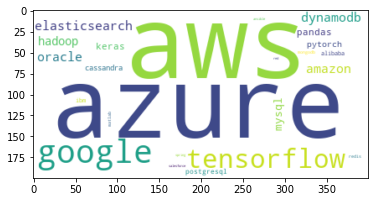

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()